In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv("C:\\Users\\My Pc\\Desktop\\Chicago_Crimes_2012_to_2017.csv")

In [9]:
df.shape

(1456714, 23)

In [8]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [10]:

df.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Dataset Shape after drop_duplicate: ', df.shape)

Dataset Shape after drop_duplicate:  (1456714, 23)


In [11]:
df.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District'], inplace=True, axis=1)

In [12]:
df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363
2,10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372
3,10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516
4,10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751


In [8]:
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

In [9]:
df.shape

(1456714, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456714 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 10 columns):
ID                      1456714 non-null int64
Date                    1456714 non-null datetime64[ns]
Block                   1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Latitude                1419631 non-null float64
Longitude               1419631 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 102.8+ MB


In [11]:
loc_to_change  = list(df['Location Description'].value_counts()[20:].index)
desc_to_change = list(df['Description'].value_counts()[20:].index)

df.loc[df['Location Description'].isin(loc_to_change) , df.columns=='Location Description'] = 'OTHER'
df.loc[df['Description'].isin(desc_to_change) , df.columns=='Description'] = 'OTHER'

In [13]:
df['Primary Type']         = pd.Categorical(df['Primary Type'])
df['Location Description'] = pd.Categorical(df['Location Description'])
df['Description']          = pd.Categorical(df['Description'])

## Exploratory Data Analysis

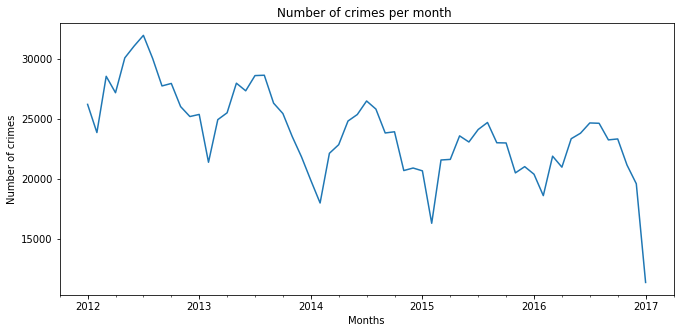

In [14]:
plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month ')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

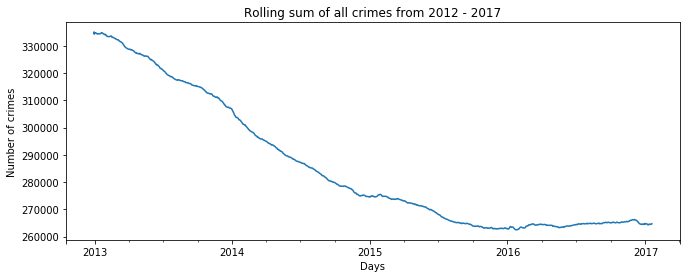

In [16]:
plt.figure(figsize=(11,4))
df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2012 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

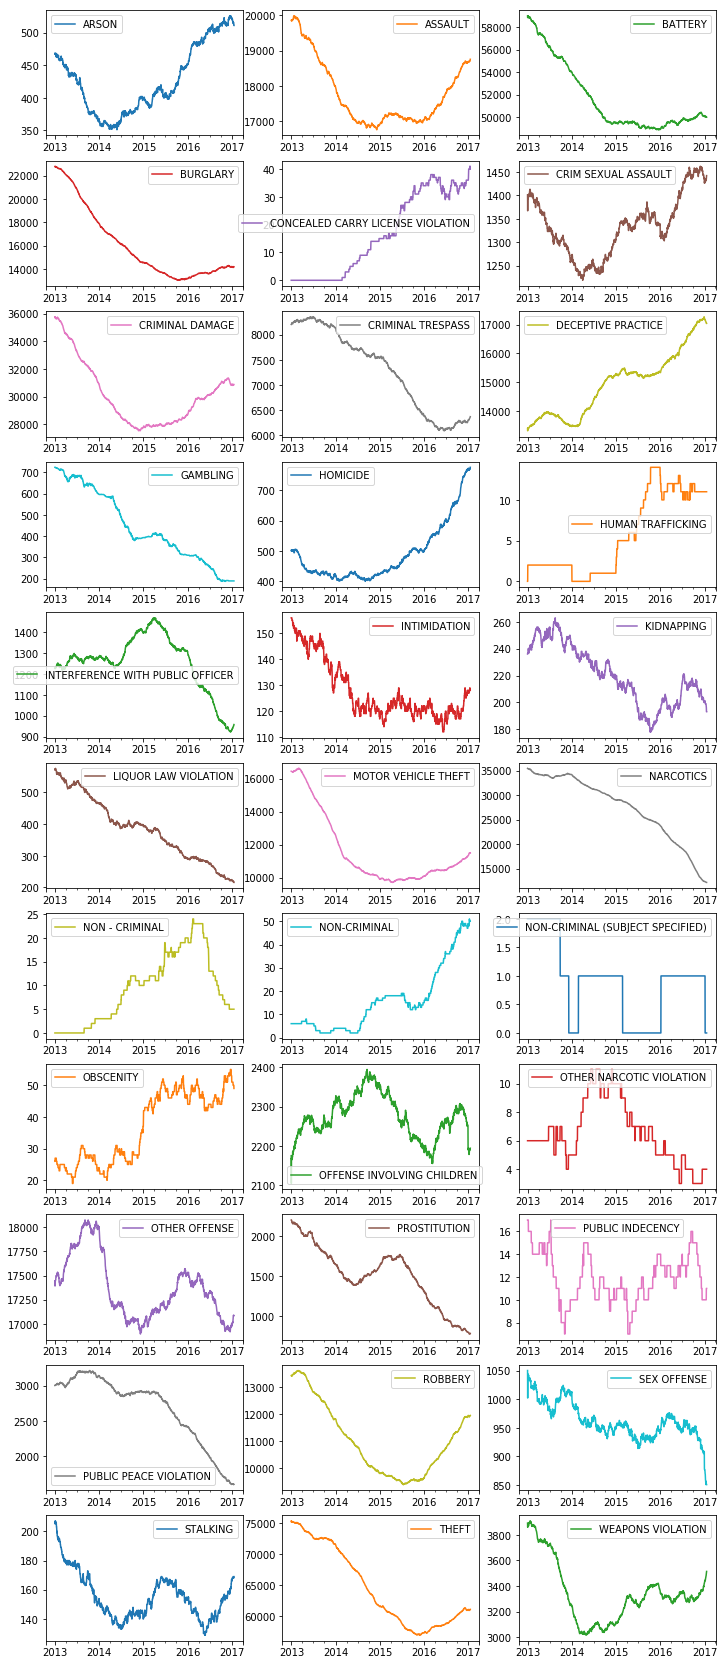

In [17]:
df_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)
df_count_date.index = pd.DatetimeIndex(df_count_date.index)
plo = df_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [4]:
crimes=pd.read_csv("C:\\Users\\My Pc\\Desktop\\Chicago_Crimes_2012_to_2017.csv",  index_col='Date')

In [5]:
crimes = crimes.iloc[:, 3: ]
crimes.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [6]:
crimes.index = pd.to_datetime(crimes.index)

In [7]:
print(crimes.shape)
print(crimes.head())

(1456714, 19)
                                   Block  IUCR            Primary Type  \
Date                                                                     
2016-05-03 23:40:00   013XX S SAWYER AVE  0486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  0486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  0460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  0820                   THEFT   

                                 Description Location Description  Arrest  \
Date                                                                        
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-

In [8]:
s = crimes[['Primary Type']]

In [9]:
s.head()

,Primary Type
Date,
2016-05-03 23:40:00,BATTERY
2016-05-03 21:40:00,BATTERY
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION
2016-05-03 22:10:00,BATTERY
2016-05-03 22:00:00,THEFT


In [10]:
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [11]:
crime_count.head()

,Primary Type,counts
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289


In [12]:
crime_count.shape

(33, 2)

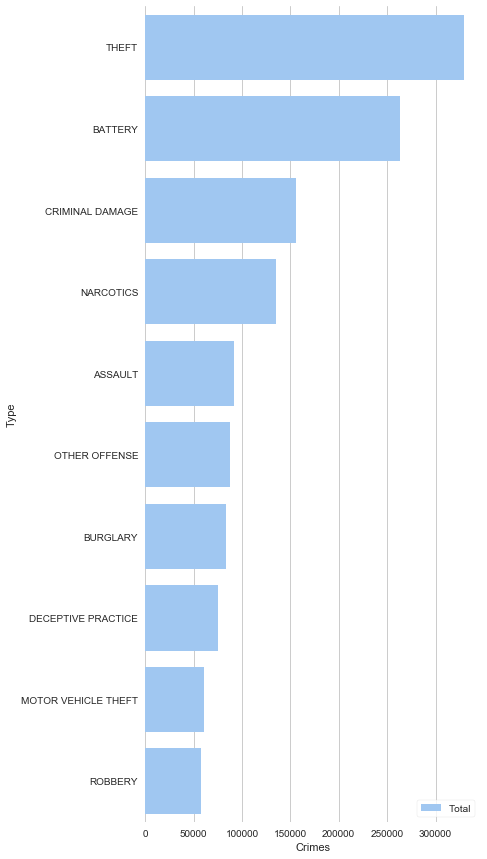

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [19]:
def heatMap(df):
    #Create Correlation df
    corr = crimes.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

In [20]:
crimes.dropna();

In [29]:
x = crimes.sample(30000)

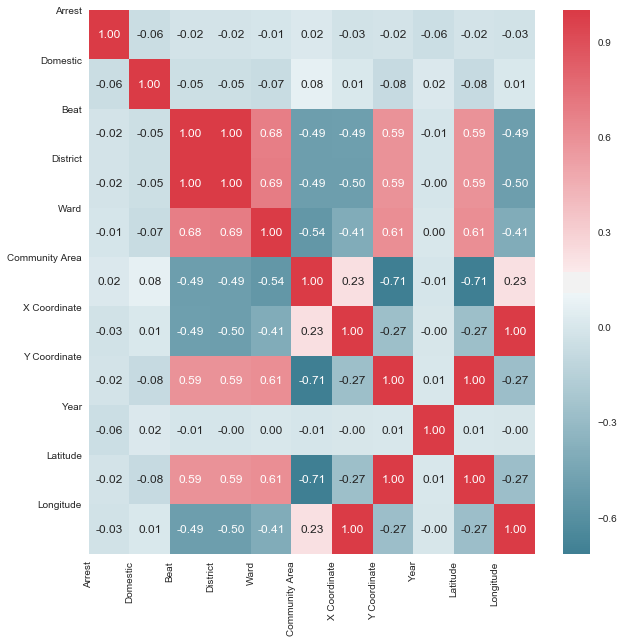

In [30]:
heatMap(x) 

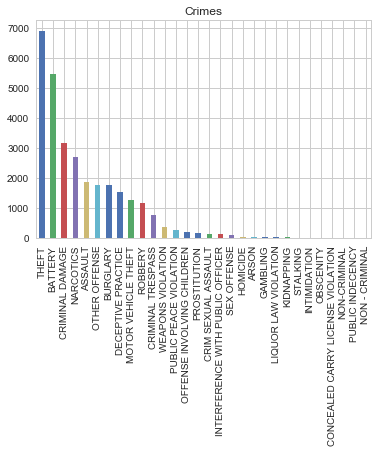

In [31]:
x['Primary Type'].value_counts().plot.bar()
plt.title("Crimes")
plt.show()

In [32]:
x_theft = x[x['Primary Type'] == "THEFT"]
x_battery = x[x['Primary Type'] == "BATTERY"]
x_cd = x[x['Primary Type'] == "CRIMINAL DAMAGE"]
x_narc = x[(x['Primary Type'] == "NARCOTICS")]

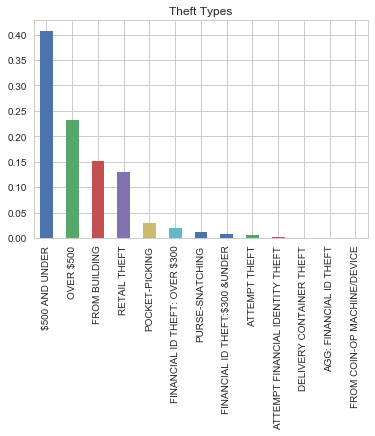

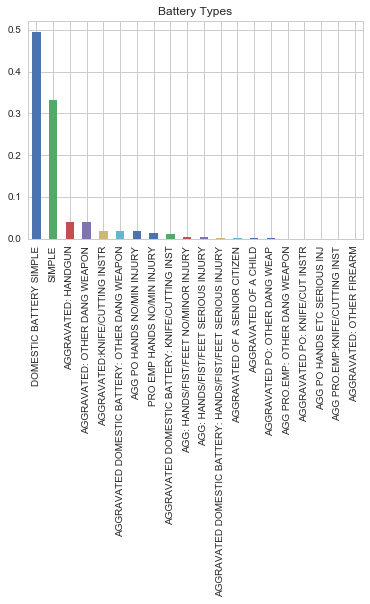

In [33]:
#plotting subtypes of different "Primary Types"
x_theft['Description'].value_counts(normalize=True).plot.bar()
plt.title("Theft Types")
plt.show()

x_battery['Description'].value_counts(normalize=True).plot.bar()
plt.title("Battery Types")
plt.show()

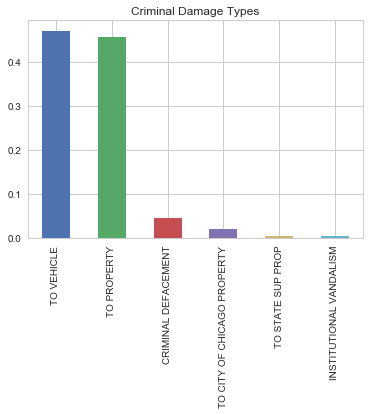

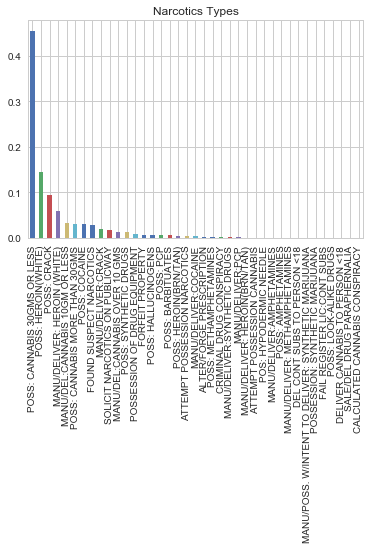

In [34]:
x_cd['Description'].value_counts(normalize=True).plot.bar()
plt.title("Criminal Damage Types")
plt.show()

x_narc['Description'].value_counts(normalize=True).plot.bar()
plt.title("Narcotics Types")
plt.show()

### Arrests 

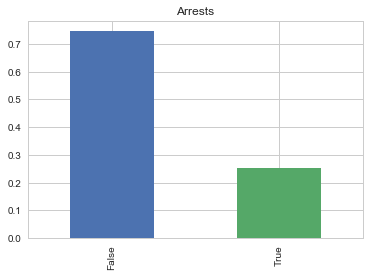

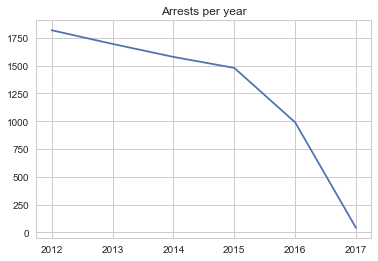

In [35]:
x['Arrest'].value_counts(normalize=True).plot.bar()
plt.title("Arrests")
plt.show()

x[x.Arrest == True]['Year'].value_counts().plot.line()
plt.title("Arrests per year")
plt.show()

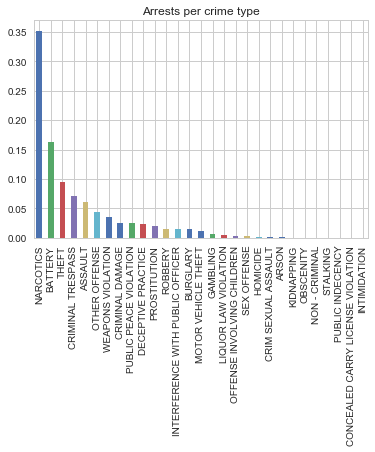

In [36]:
#ARREST RATE FOR ALL CRIME TYPES
x[x.Arrest == True]['Primary Type'].value_counts(normalize=True).plot.bar()
plt.title("Arrests per crime type")
plt.show()

In [14]:
crimes_2012 = crimes.loc['2012']
crimes_2013 = crimes.loc['2013']
crimes_2014 = crimes.loc['2014']
crimes_2015 = crimes.loc['2015']
crimes_2016 = crimes.loc['2016']
crimes_2017 = crimes.loc['2017']

## Yearly crimes
arrest_yearly = crimes[crimes['Arrest'] == True]['Arrest']

In [15]:
print(arrest_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:44:00    True
2016-05-03 23:11:00    True
2016-05-04 11:15:00    True
2016-05-04 11:30:00    True
Name: Arrest, dtype: bool


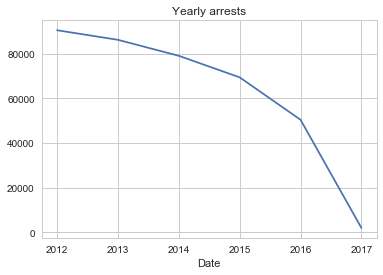

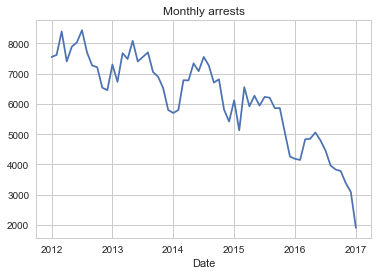

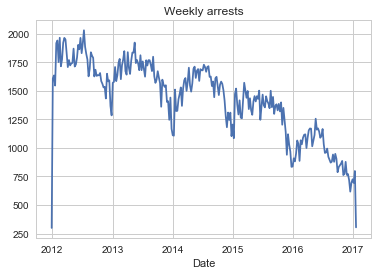

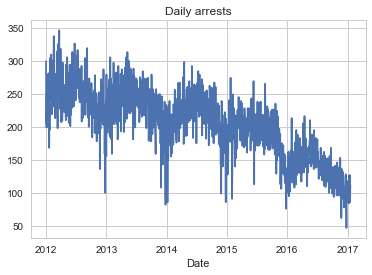

In [16]:
plt.subplot()
# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

### Domestic Voilence

In [17]:
domestic_yearly = crimes[crimes['Domestic'] == True]['Domestic']
print(domestic_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:40:00    True
2016-05-03 22:00:00    True
2016-05-03 22:30:00    True
2016-05-03 23:11:00    True
Name: Domestic, dtype: bool


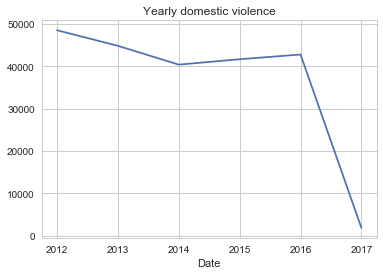

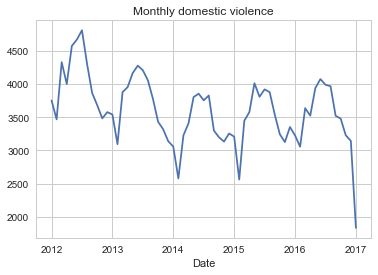

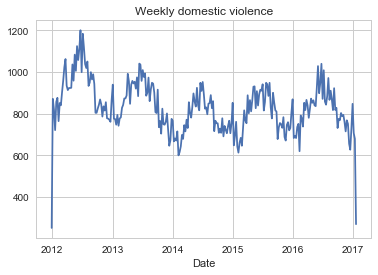

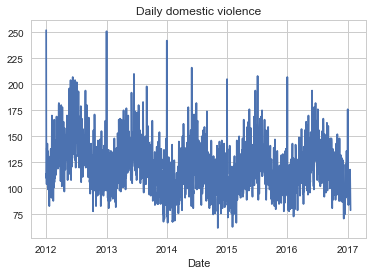

In [18]:
plt.subplot()
# yearly domestic violence
domestic_yearly.resample('A').sum().plot()
plt.title('Yearly domestic violence')
plt.show()
# Monthly domestic violence
domestic_yearly.resample('M').sum().plot()
plt.title('Monthly domestic violence')
plt.show()
# Weekly domestic violence
domestic_yearly.resample('W').sum().plot()
plt.title('Weekly domestic violence')
plt.show()
# daily domestic violence
domestic_yearly.resample('D').sum().plot()
plt.title('Daily domestic violence')
plt.show()
plt.show()

### Top 5 crimes trend over the years

In [21]:
theft_2012 = pd.DataFrame(crimes_2012[crimes_2012['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2013 = pd.DataFrame(crimes_2013[crimes_2013['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2014 = pd.DataFrame(crimes_2014[crimes_2014['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2015 = pd.DataFrame(crimes_2015[crimes_2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2016 = pd.DataFrame(crimes_2016[crimes_2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [22]:
grouper = theft_2012.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2013 = theft_2013.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2014 = theft_2014.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2015 = theft_2015.groupby([pd.TimeGrouper('M'), 'Primary Type'])
grouper_2016 = theft_2016.groupby([pd.TimeGrouper('M'), 'Primary Type'])

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


In [23]:
data_2012 = grouper['Primary Type'].count().unstack()
data_2013 = grouper_2013['Primary Type'].count().unstack()
data_2014 = grouper_2014['Primary Type'].count().unstack()
data_2015 = grouper_2015['Primary Type'].count().unstack()
data_2016 = grouper_2016['Primary Type'].count().unstack()

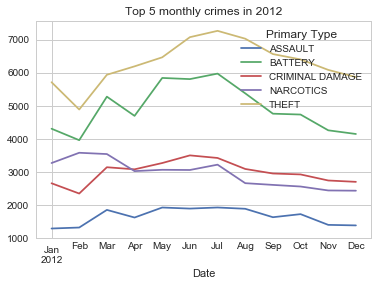

In [24]:
data_2012.plot()
plt.title("Top 5 monthly crimes in 2012")
plt.show()

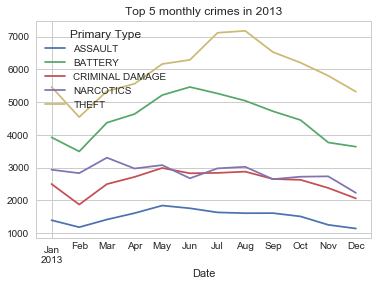

In [25]:
data_2013.plot()
plt.title("Top 5 monthly crimes in 2013")
plt.show()

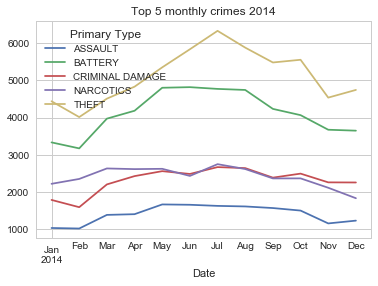

In [26]:
data_2014.plot()
plt.title("Top 5 monthly crimes 2014")
plt.show()

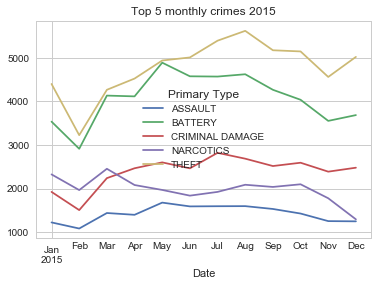

In [27]:
data_2015.plot()
plt.title("Top 5 monthly crimes 2015")
plt.show()

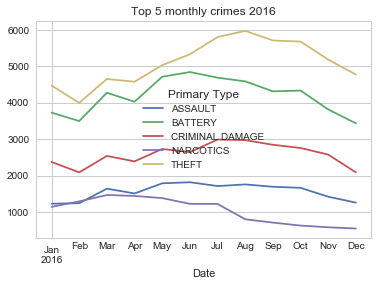

In [28]:
data_2016.plot()
plt.title("Top 5 monthly crimes 2016")
plt.show()

In [15]:
df = df.dropna(axis = 0, how = 'any')

In [17]:
Groups = df.groupby(df['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

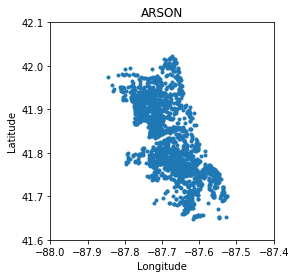

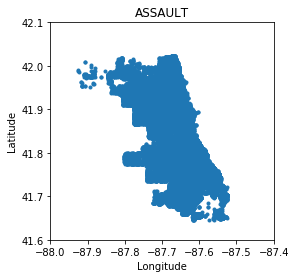

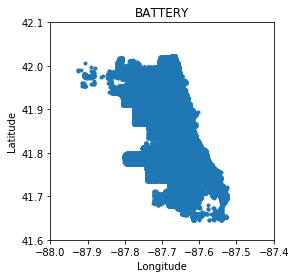

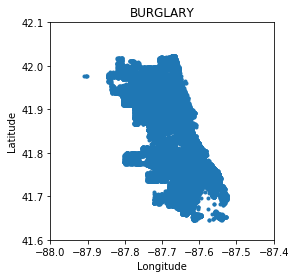

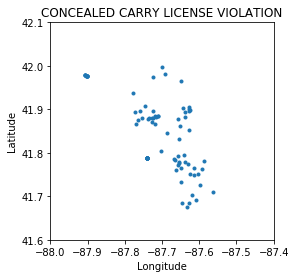

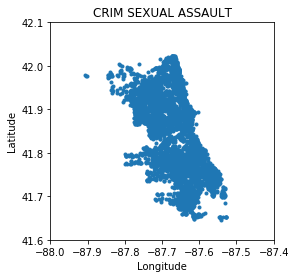

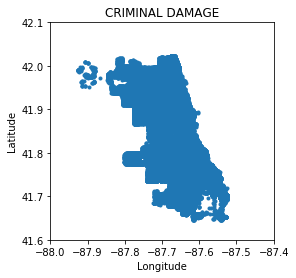

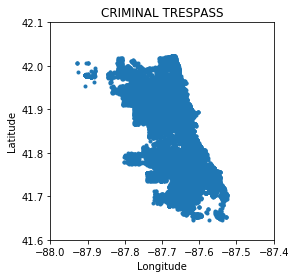

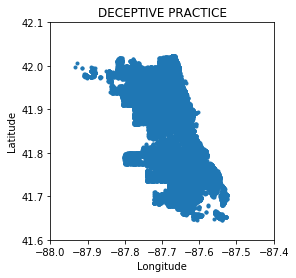

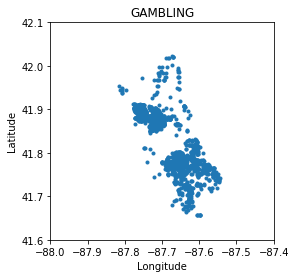

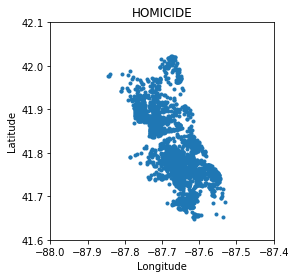

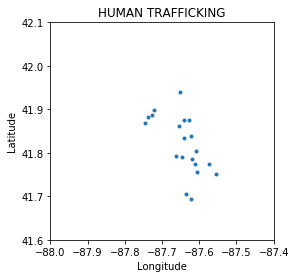

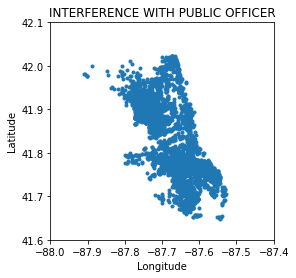

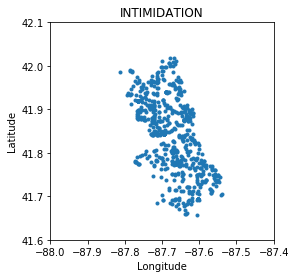

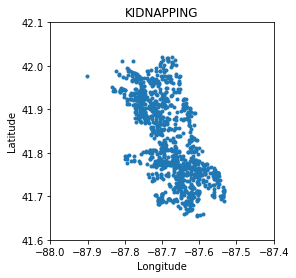

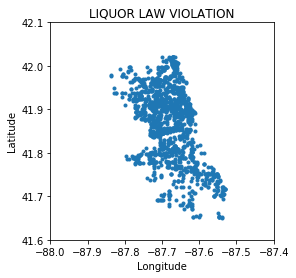

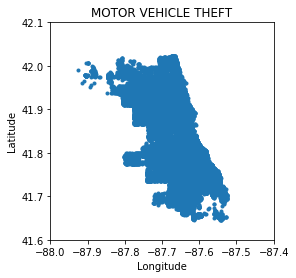

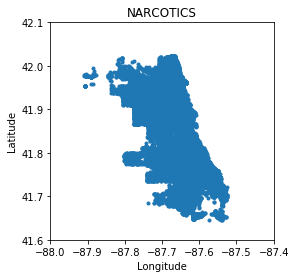

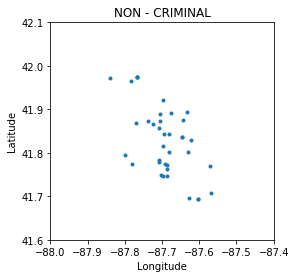

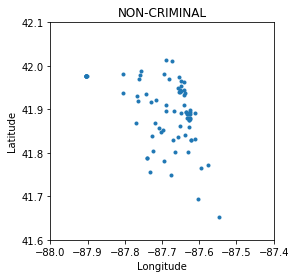

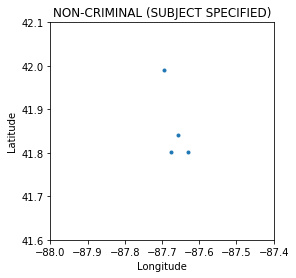

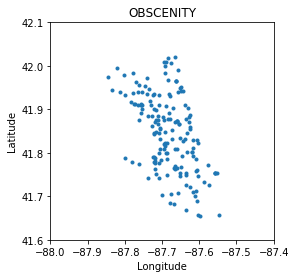

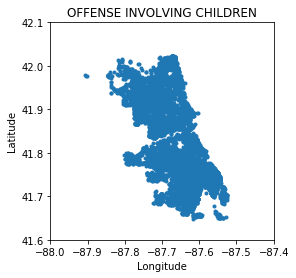

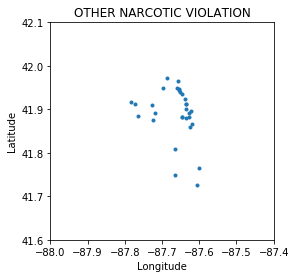

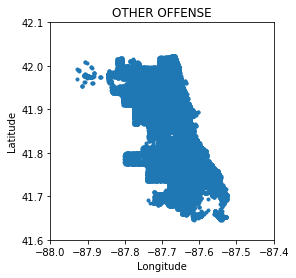

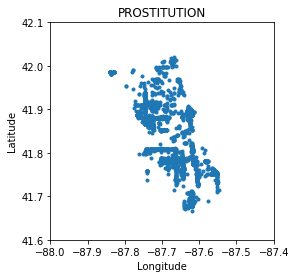

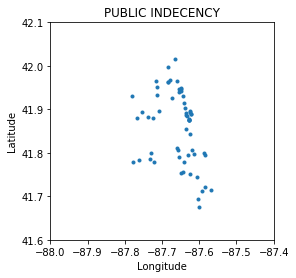

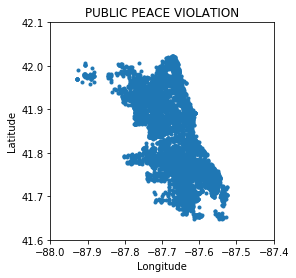

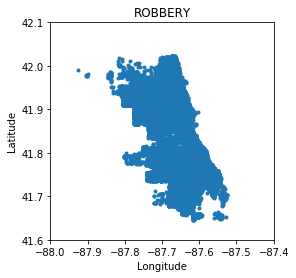

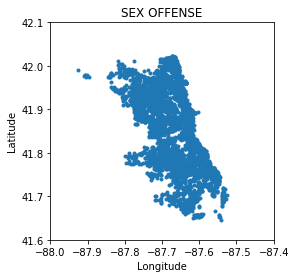

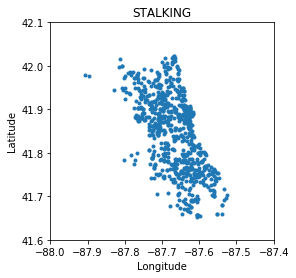

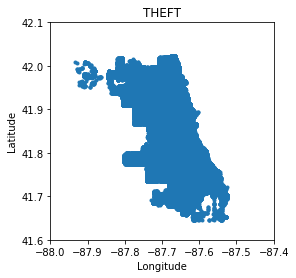

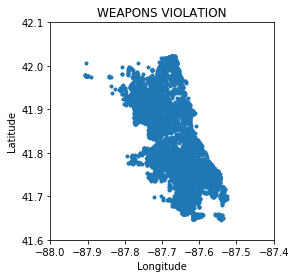

In [19]:
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(Groups[key].Longitude, Groups[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [20]:
#Try to predict arrest based on data - NaiveBayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
Arrest_Data = df.drop('Arrest', axis = 1)
Arrest_Data = Arrest_Data.drop('Date', axis = 1)
Arrest_Data = Arrest_Data.drop('Block', axis = 1)
Arrest_Target = df['Arrest']

In [21]:
Arrest_Data['Primary Type'] = (Arrest_Data['Primary Type']).cat.codes
Arrest_Data['Location Description'] = (Arrest_Data['Location Description']).cat.codes
Arrest_Data['Description'] = (Arrest_Data['Description']).cat.codes

In [22]:
gnb = GaussianNB()
scores = cross_val_score(gnb, Arrest_Data, Arrest_Target)
scores.mean()

0.7329486327546508

In [28]:
df.Date = pd.to_datetime(df.Date, format = '%m/%d/%Y %I:%M:%S %p')
df.index = pd.DatetimeIndex(df.Date)

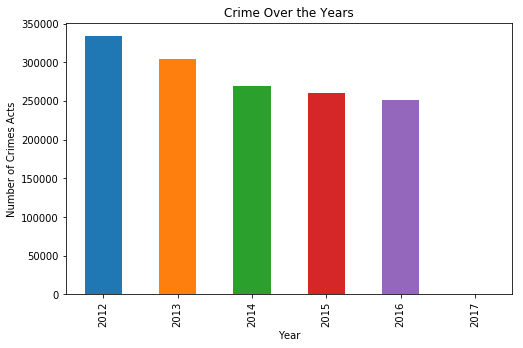

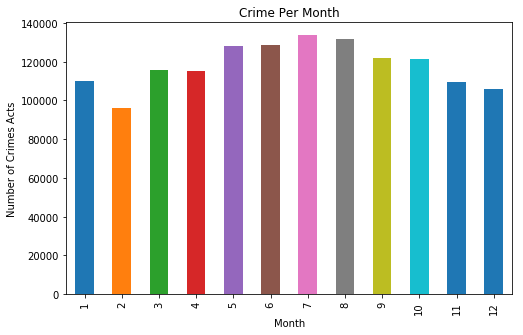

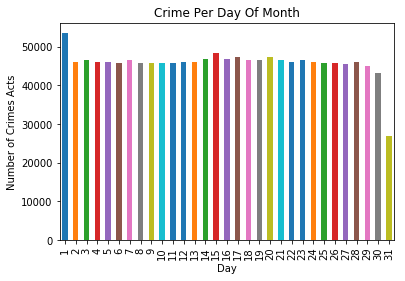

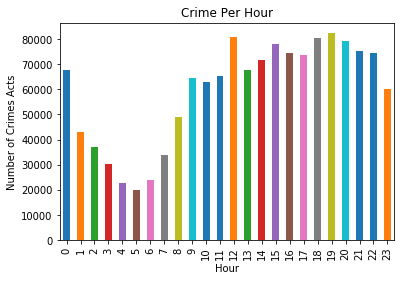

In [29]:
plt.figure(figsize = (8,5))
df.groupby([df.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))
#make graph of crimes per month
df.groupby([df.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per day
df.groupby([df.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per hour
df.groupby([df.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

C:\Users\My Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\My Pc\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\My Pc\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


NameError: name 'red' is not defined

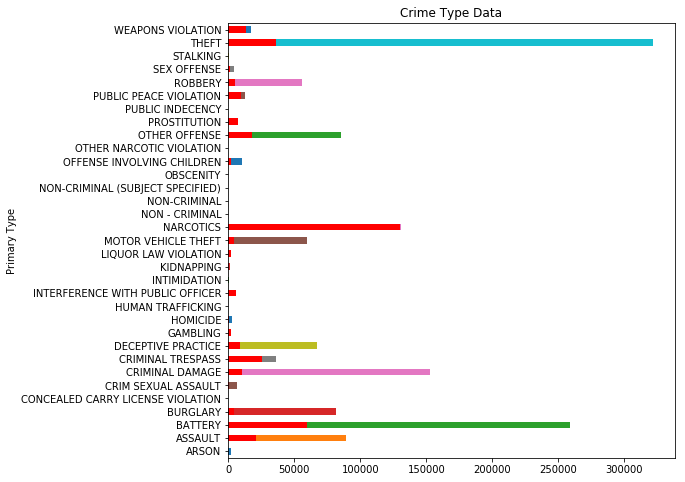

In [39]:
#Arrest rates per crime type
Crime_Data_Type = df.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = df.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (8,8))
plt.hold(True)
df.groupby(df['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().plot(kind = 'barh', color = 'r')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])
plt.hold(False)

plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / df.groupby(df['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Crime Type')
plt.show()